In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# data columns

# videoId,
# title,
# description,
# tags,
# viewCount,
# likeCount,
# favoriteCount,
# commentCount,
# publishedAt,
# channelId,
# channelTitle,
# country

use_columns = ['videoId', 'title', 'description', 'tags', 'viewCount', 'likeCount', 'favoriteCount', 'commentCount', 'publishedAt', 'channelId', 'channelTitle', 'country']


In [167]:
from dotenv import load_dotenv
import os
import sys
import pandas as pd
import numpy as np
from youtubeapi import YoutubeApi
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.font_manager as fm
sys.path.append('../refs/')
from utils import Utils

# font setting
font_location = 'C:/Windows/Fonts/Malgun.ttf' if sys.platform == 'win32' else '/System/Library/Fonts/AppleSDGothicNeo.ttc'
font_name = fm.FontProperties(fname=font_location).get_name()
# print(font_name)
matplotlib.rc('font', family=font_name)

load_dotenv()
apiKey = os.environ.get('YoutubeApiToken')
url = 'https://youtube.googleapis.com/youtube/v3/'

api = YoutubeApi(apiKey, use_columns)

searchQuery = '코이티비 베트남'
# maxResults = 15

In [ ]:
datas = api.search_videos(searchQuery)
df = api.get_video_dataframe(datas, '베트남')
df

In [ ]:
df.info()

In [ ]:
df.to_csv('../data/vietnam_youtube.csv', encoding='utf-8', index=False)

In [ ]:
asia_data = pd.read_csv('../data/asia_data_kor.csv')
asia_data['Year'].fillna(method='ffill', inplace=True)
asia_data

In [ ]:
year = df.loc[0, 'publishedAtYear']
month = df.loc[0, 'publishedAtMonth']

display(year, month)

In [ ]:
# 해당 동영상 년/월 의 방문자 수
masking = (asia_data['Year'] == (str(year) + '년')) & (asia_data['month'] == (str(month) + '월'))
published_asia_data = asia_data[masking]
display(published_asia_data)

# 해당 동영상 1년 전/후 의 방문자 수
prev_masking = (asia_data['Year'] == (str(year - 1) + '년')) & (asia_data['month'] == (str(month) + '월'))
prev_asia_data = asia_data[prev_masking]
display(prev_asia_data)

next_masking = (asia_data['Year'] == (str(year + 1) + '년')) & (asia_data['month'] == (str(month) + '월'))
next_asia_data = asia_data[next_masking]
display(next_asia_data)


In [ ]:
published_asia_data.index.values[0]

In [ ]:
idx_pub = published_asia_data.index.values[0]
prev_idx = prev_asia_data.index.values[0]
next_idx = next_asia_data.index.values[0]

# prev_period = asia_data.iloc[prev_idx:idx_pub+1, :]
prev_period = asia_data.loc[prev_idx:idx_pub+1, ['Year', 'month', '베트남_명수']]
display(prev_period)
# next_period = asia_data.iloc[idx_pub:next_idx+1, :]
next_period = asia_data.loc[idx_pub:next_idx+1, ['Year', 'month', '베트남_명수']]
display(next_period)


In [ ]:
prev_period['date'] = prev_period['Year'] + prev_period['month']
next_period['date'] = next_period['Year'] + next_period['month']

In [ ]:
date = str(year) + '년' + str(month) + '월'
date

In [ ]:
sns.barplot(data = prev_period, x='date', y='베트남_명수', edgecolor=['b' if x == date else 'w' for x in prev_period['date']])
plt.xlabel('방문 시기')
plt.ylabel('방문객 수')
plt.title('코이티비 베트남 유튜브 영상 전/후 방문객 수 비교', pad=10, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('배트남 방문객 증감_prev.png')
plt.show()


In [ ]:
sns.barplot(data = next_period, x='date', y='베트남_명수', edgecolor=['b' if x == date else 'w' for x in next_period['date']])
plt.xlabel('방문 시기')
plt.ylabel('방문객 수')
plt.title('코이티비 베트남 유튜브 영상 전/후 방문객 수 비교', pad=10, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('배트남 방문객 증감_next.png')
plt.show()

In [ ]:
total = pd.concat([prev_period, next_period[2:]])
total

sns.barplot(data = total, x='date', y='베트남_명수', edgecolor=['b' if x == date else 'w' for x in total['date']])
plt.xlabel('방문 시기')
plt.ylabel('방문객 수')
plt.title('코이티비 베트남 유튜브 영상 전/후 방문객 수 비교', pad=10, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('배트남 방문객 증감_total.png')
plt.show()

In [ ]:
# '전년대비' 컬럼 drop
df_asia_count = asia_data.drop(asia_data.columns[asia_data.columns.str.contains('전년대비')], axis=1)
df_asia_count = df_asia_count[df_asia_count.month == '누계']
df_asia_count
# df_asia_count.T

In [ ]:
df_asia_count['일본_명수'].sum()

In [ ]:
df_asia_count2 = df_asia_count.drop(columns='month').T.reset_index()
df_asia_count2.columns = df_asia_count2.iloc[0]
df_asia_count2 = df_asia_count2.iloc[1:].reset_index(drop=True)
df_asia_count2['Year'] = df_asia_count2['Year'].str.replace("_명수", "")
df_asia_count2 = df_asia_count2.rename({'Year': 'country'}, axis=1)
df_asia_count2

In [ ]:
# NaN 제거
# df_asia_count2.info()
# df_asia_count2[df_asia_count2.isnull().any(axis=1)]
# df_asia_count2 = df_asia_count2.fillna(0)
# df_asia_count2.columns == 'country'

country = df_asia_count2['country']
df_asia_count2 = df_asia_count2.fillna(0)
df_asia_count2 = df_asia_count2.loc[:, ~(df_asia_count2.columns == 'country')].replace('-', 0).astype('int64')
df_asia_count2.insert(0, 'country', country)
df_asia_count2['Sum'] = df_asia_count2.loc[:, ~(df_asia_count2.columns == 'country')].sum(axis=1)
df_asia_count2 = df_asia_count2.loc[1:,].reset_index(drop=True)
df_asia_count2

In [ ]:
plt.figure(figsize=(15, 8))

sns.barplot(data=df_asia_count2, x='country', y='Sum')
plt.xlabel('국가')
plt.ylabel('누적 방문객 수 (만 명)')
plt.title('아시아 국가 별 누적 방문객 수', pad=10, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('아시아 국가 별 누적 방문객 수.png')
plt.show()

In [ ]:
vietnam_youtube['viewCount'].idxmax()
vietnam_youtube['viewCount'].idxmin()

In [ ]:
# 코로나 종료로 볼 수 있는 국가 리스트
# 격리 면제를 기준으로 산출
# - 일본 → '2022.9.7'
# - 대만 → '2022.10.13'
# - 홍콩 → '2022.9.26'
# - 필리핀 → '2022.2.10'
# - 베트남 → '2022.5.15'
# - 태국 → '2022.9.3'

exit_covid_country = {
  "국가명" : ['일본', '대만', '홍콩', '필리핀', '베트남', '태국'],
  "해제일" : ['2022.9.7', '2022.10.13', '2022.9.26', '2022.2.10', '2022.5.15', '2022.9.3']
}

exit_covid = pd.DataFrame(exit_covid_country)
exit_covid['해제일'] = pd.to_datetime(exit_covid['해제일'])
# for Linux '#' is replaced by '-' -> %-m : test 필요
# exit_covid['year_month'] = exit_covid['해제일'].dt.strftime('%Y년%#m월')
exit_covid['year'] = exit_covid['해제일'].dt.year
exit_covid['month'] = exit_covid['해제일'].dt.month

exit_covid.to_csv('../data/exit_covid.csv', encoding='utf-8-sig')
exit_covid

In [ ]:
# asia 데이터
asia_data = pd.read_csv('../data/asia_data_kor.csv')
asia_data['Year'].fillna(method='ffill', inplace=True)

In [ ]:
# 누계 제거
asia_data = asia_data.drop(asia_data[asia_data['month'].values == '누계'].index)
asia_data

In [ ]:
# 베트남 해제 시기 추출
year = int(exit_covid.loc[exit_covid['국가명'] == '베트남']['year'])
month = int(exit_covid.loc[exit_covid['국가명'] == '베트남']['month'])

In [ ]:
# 2018 년 부터 2019 년 까지
prev_start_idx = asia_data[(asia_data['Year'] == f'{2018}년') & (asia_data['month'] == f'{month + 1}월')].index.values[0]
prev_end_idx = asia_data[(asia_data['Year'] == f'{2019}년') & (asia_data['month'] == f'{month}월')].index.values[0]
# display(prev_start_idx, prev_end_idx)

# 베트남 == 8 
# asia_data.iloc[prev_start_idx:prev_end_idx + 1, 8]
vietnam_prev_covid = asia_data.iloc[prev_start_idx:prev_end_idx + 1]
vietnam_prev_covid['date'] = vietnam_prev_covid['Year'] + vietnam_prev_covid['month']
vietnam_prev_covid

In [ ]:
# exit_covid 이후 데이터
# 베트남 : 2022년 5월 ~ 2023년 4월
next_start_idx = asia_data[(asia_data['Year'] == f'{year}년') & (asia_data['month'] == f'{month}월')].index.values[0]
next_end_idx = asia_data[(asia_data['Year'] == f'{year + 1}년') & (asia_data['month'] == f'{month - 1}월')].index.values[0]

# 베트남 == 8
# asia_data.iloc[next_start_idx:next_end_idx + 1, 8]
vietnam_next_covid = asia_data.iloc[next_start_idx:next_end_idx + 1]
vietnam_next_covid.loc[vietnam_next_covid['베트남_명수'].isna(), '베트남_명수'] = 0
vietnam_next_covid['date'] = vietnam_next_covid['Year'] + vietnam_next_covid['month']
vietnam_next_covid

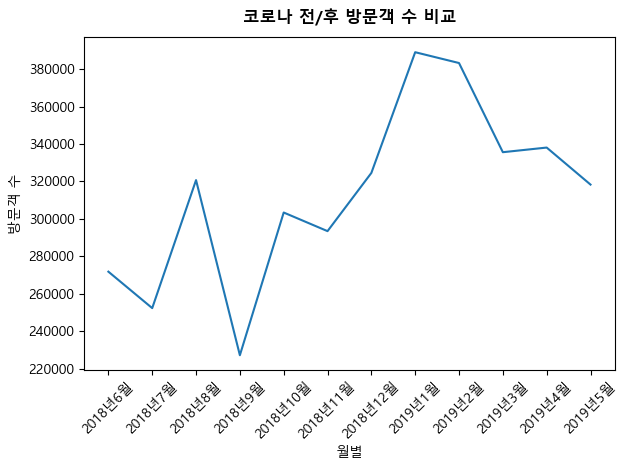

In [153]:
sns.lineplot(data = vietnam_prev_covid, x='date', y='베트남_명수')
plt.xlabel('월별')
plt.ylabel('방문객 수')
plt.title('코로나 전/후 방문객 수 비교', pad=10, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('베트남코로나이전방문객수.png')
plt.show()

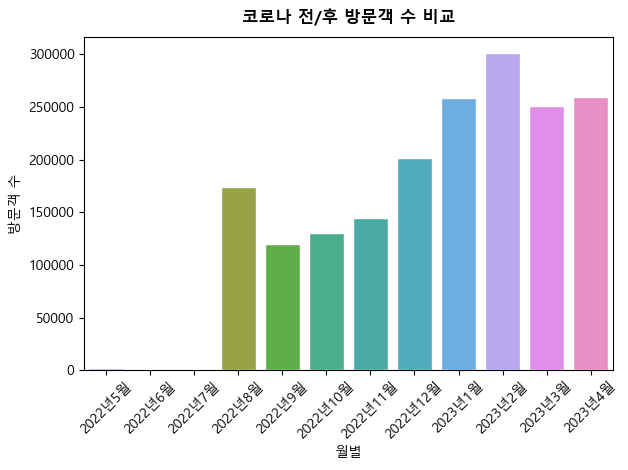

In [177]:
sns.barplot(data = vietnam_next_covid, x='date', y='베트남_명수', edgecolor=['b' if x == '2022년5월' else 'w' for x in vietnam_next_covid['date']])
plt.xlabel('월별')
plt.ylabel('방문객 수')
plt.title('코로나 전/후 방문객 수 비교', pad=10, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('베트남코로나이후방문객수.png')
plt.show()

C:\Users\shockz\AppData\Local\Temp\ipykernel_4244\2894963031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnam_prev_covid['viet_diff'] = vietnam_prev_covid['베트남_명수'].rolling(window=2).apply(lambda x: ((x.iloc[1] - x.iloc[0])/x.iloc[0]))
C:\Users\shockz\AppData\Local\Temp\ipykernel_4244\2894963031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnam_prev_covid['viet_pct'] = vietnam_prev_covid['베트남_명수'].pct_change() * 100
C:\Users\shockz\AppData\Local\Temp\ipykernel_4244\2894963031.py:16: Use

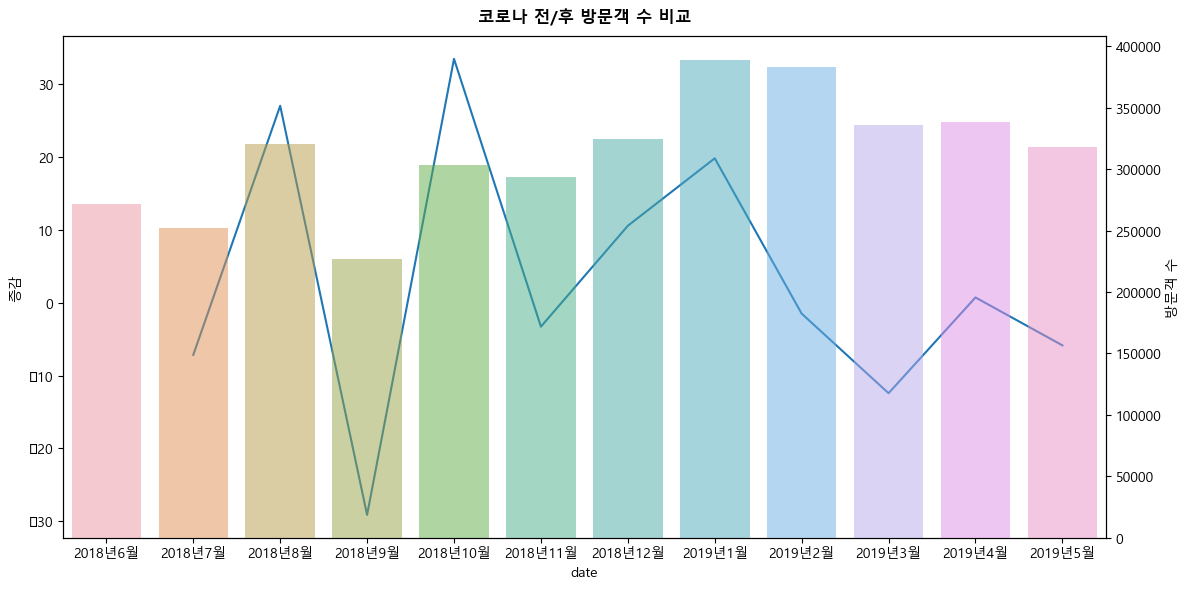

In [178]:
# 증감율 생성
vietnam_prev_covid['viet_diff'] = vietnam_prev_covid['베트남_명수'].rolling(window=2).apply(lambda x: ((x.iloc[1] - x.iloc[0])/x.iloc[0]))
vietnam_prev_covid['viet_pct'] = vietnam_prev_covid['베트남_명수'].pct_change() * 100

# bar + line
fig, ax1 = plt.subplots(figsize=(12, 6))
plt.title('코로나 전/후 방문객 수 비교', pad=10, fontweight='bold')

plt.ylabel('증감')
sns.lineplot(data = vietnam_prev_covid, x='date', y='viet_pct', ax=ax1)
ax2 = ax1.twinx()
plt.xlabel('월별')
sns.barplot(data = vietnam_prev_covid, x='date', y='베트남_명수', alpha=0.5, ax=ax2)
plt.ylabel('방문객 수')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('temp.png')
plt.show()